# Predição com modelos baseline

In [39]:
import matplotlib
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gc
from scipy.signal import find_peaks
import sys
from pandas import datetime
from pandas import concat
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler


/home/joao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if __name__ == '__main__':


In [40]:
PATH_DATA_es = '/home/joao/Desktop/AA2-Grupo13/Data/serie_historica_acumulados.csv'
PATH_DATA_it = '/home/joao/Desktop/AA2-Grupo13/Data/dpc-covid19-ita-regioni2.csv'

In [41]:
d_name_es = {
'AN':'Andalucía',
'AR':'Aragón',
'AS':'Asturias',
'IB':'Baleares',
'CN':'Canarias',
'CB':'Cantabria',
'CM':'Castilla La Mancha',
'CL':'Castilla y León',
'CT':'Cataluña',
'CE':'Ceuta',
'VC':'C. Valenciana',
'EX':'Extremadura',
'GA':'Galicia',
'MD':'Madrid',
'ML':'Melilla',
'MC':'Murcia',
'NC':'Navarra',
'PV':'País Vasco',
'RI':'La Rioja'
}

d_ccaa_es = {
'Andalucía': 'Andalucía',
'Aragón': 'Aragón',
'Asturias': 'Principado de Asturias',
'Baleares': 'Islas Baleares',
'Canarias': 'Islas Canarias',
'Cantabria':'Cantabria',
'Castilla La Mancha': 'Castilla-La Mancha',
'Castilla y León': 'Castilla y León',
'Cataluña': 'Cataluña',
'Ceuta': 'Ceuta y Melilla',
'C. Valenciana': 'Comunidad Valenciana',
'Extremadura': 'Extremadura',
'Galicia': 'Galicia',
'Madrid': 'Comunidad de Madrid',
'Melilla': 'Ceuta y Melilla',
'Murcia': 'Región de Murcia',
'Navarra': 'Comunidad Foral de Navarra',
'País Vasco': 'País Vasco',
'La Rioja': 'La Rioja'
}

d_ccaa_id_es = {
'Andalucía': "1",
'Aragón' : "2",
'Principado de Asturias': "3",
'Islas Baleares': "4",
'Islas Canarias': "5",
'Cantabria': "6",
'Castilla-La Mancha': "7",
'Castilla y León': "8",
'Cataluña': "9",
'Ceuta y Melilla': "10",
'Comunidad Valenciana': "11",
'Extremadura': "12",
'Galicia': "13",
'Comunidad de Madrid' : "14",
'Ceuta y Melilla': "15",
'Región de Murcia': "16",
'Comunidad Foral de Navarra': "17",
'País Vasco': "18",
'La Rioja': "19"
}

d_ccaa_population_es = {
'Andalucía': 8414240,
'Aragón' : 1319291,
'Principado de Asturias': 1022800,
'Islas Baleares': 1149460,
'Islas Canarias': 2153389,
'Cantabria': 581078,
'Castilla-La Mancha': 2032863,
'Castilla y León': 2399548,
'Cataluña': 7675217,
'Ceuta y Melilla': 171264,
'Comunidad Valenciana': 5003769,
'Extremadura': 1067710,
'Galicia': 2699499,
'Comunidad de Madrid' : 6663394,
'Ceuta y Melilla': 171264,
'Región de Murcia': 1493898,
'Comunidad Foral de Navarra': 654214,
'País Vasco': 2207776,
'La Rioja': 316798
}

d_name_it = {
'Abruzzo': 'Abruzzo',
'Basilicata': 'Basilicata',
'Calabria': 'Calabria',
'Campania': 'Campania',
'Emilia-Romagna': 'Emilia-Romagna',
'Friuli Venezia Giulia': 'Friuli Venezia Giulia',
'Lazio': 'Lazio',
'Liguria': 'Liguria',
'Lombardia': 'Lombardia',
'Marche': 'Marche',
'Molise': 'Molise',
'Piemonte': 'Piemonte',
'Puglia': 'Puglia',
'Sardegna': 'Sardegna',
'Sicilia': 'Sicilia',
'Toscana': 'Toscana',
'P.A. Bolzano': 'P.A. Bolzano',
'P.A. Trento': 'P.A. Trento',
'Umbria': 'Umbria' ,
'Valle d\'Aosta': 'Valle d\'Aosta',
'Veneto': 'Veneto'
}

regione_id_it = {
'Abruzzo': 1,
'Basilicata' : 2,
'Calabria': 3,
'Campania': 4,
'Emilia-Romagna': 5,
'Friuli Venezia Giulia': 6,
'Lazio': 7,
'Liguria': 8,
'Lombardia': 9,
'Marche': 10,
'Molise': 11,
'Piemonte': 12,
'Puglia': 13,
'Sardegna' : 14,
'Sicilia': 15,
'Toscana': 16,
'P.A. Bolzano': 17,
'P.A. Trento': 18,
'Umbria' : 19,
'Valle d\'Aosta': 20,
'Veneto': 21
}

regione_pop_it = {
'Abruzzo': 1311580,
'Basilicata' : 562869,
'Calabria': 1947131,
'Campania': 5801692,
'Emilia-Romagna': 4459477,
'Friuli Venezia Giulia': 1215220,
'Lazio': 5879082,
'Liguria': 1550640,
'Lombardia': 10060574,
'Marche': 1525271,
'Molise': 305617,
'Piemonte': 4356406,
'Puglia': 4029053,
'Sardegna' : 1639591,
'Sicilia': 4999891,
'Toscana': 3729641,
'P.A. Bolzano': 520891,
'P.A. Trento': 117417,
'Umbria' : 882015,
'Valle d\'Aosta': 125666,
'Veneto': 4905854
}

In [42]:
df_es = pd.read_csv(PATH_DATA_es, encoding='latin-1')
df_es.fillna(0, inplace = True)
df_es["CCAA"] = df_es["CCAA"].map(d_name_es)
df_es["CCAA_for_Folium"] = df_es["CCAA"].map(d_ccaa_es)
df_es["id"] = df_es["CCAA_for_Folium"].map(d_ccaa_id_es)

df_es["Population"] = df_es["CCAA_for_Folium"].map(d_ccaa_population_es)


df_es.rename(columns = {"FECHA":"DATE",
                    "CASOS":"TOTAL_INFECTED",
                    "Hospitalizados":"REQUIERED_HOSPITALIZATION",
                    "UCI":"REQUIERED_ADVANCED_CARE",
                    "Fallecidos":"TOTAL_DEATHS",
                    "Recuperados":"CURED"}, inplace = True)

df_es["CCAA"].isnull().sum()
df_es.dropna(inplace = True, axis = "rows") # apagar o texto no fim do ficheiro
df_es["CCAA"].isnull().sum()

def correct_date_es(date_str):
    list_dates = date_str.split("/")
    day = list_dates[0]
    month = list_dates[1]
    year = list_dates[2]
    
    if len(day) == 1:
        day = "0" + day
    if len(month) == 1:
        month = "0" + month
        
    return "/".join([day, month, year])

df_es["NEW_DATE"] = df_es["DATE"].apply(correct_date_es)
df_es["DATE"] = pd.to_datetime(df_es["NEW_DATE"], format='%d/%m/%Y')
df_es = df_es[["id", "CCAA", "DATE", "TOTAL_INFECTED", "REQUIERED_HOSPITALIZATION", "REQUIERED_ADVANCED_CARE", "TOTAL_DEATHS", "CURED","Population"]]
df_es["id"].astype(np.int16)
df_es.head()

,id,CCAA,DATE,TOTAL_INFECTED,REQUIERED_HOSPITALIZATION,REQUIERED_ADVANCED_CARE,TOTAL_DEATHS,CURED,Population
0,1,Andalucía,2020-02-20,0.0,0.0,0.0,0.0,0.0,8414240.0
1,2,Aragón,2020-02-20,0.0,0.0,0.0,0.0,0.0,1319291.0
2,3,Asturias,2020-02-20,0.0,0.0,0.0,0.0,0.0,1022800.0
3,4,Baleares,2020-02-20,1.0,0.0,0.0,0.0,0.0,1149460.0
4,5,Canarias,2020-02-20,1.0,0.0,0.0,0.0,0.0,2153389.0


In [43]:
df_it = pd.read_csv(PATH_DATA_it, encoding='latin-1')
df_it.fillna(0, inplace = True)
df_it["CCAA"] = df_it["denominazione_regione"].map(d_name_it)
df_it["CCAA_for_Folium"] = df_it["denominazione_regione"].map(d_name_it)
df_it["id"] = df_it["CCAA_for_Folium"].map(regione_id_it)

df_it["Population"] = df_it["CCAA_for_Folium"].map(regione_pop_it)

df_it.rename(columns = {"data":"DATE",
                    "totale_casi":"TOTAL_INFECTED",
                    "totale_ospedalizzati":"REQUIERED_HOSPITALIZATION",
                    "terapia_intensiva":"REQUIERED_ADVANCED_CARE",
                    "deceduti":"TOTAL_DEATHS",
                    "dimessi_guariti":"CURED"}, inplace = True)
df_it["CCAA"].isnull().sum()

def correct_date_it(date_str):
    list_dates = date_str.split("-")
    day = list_dates[2]
    month = list_dates[1]
    year = list_dates[0]
        
    return "/".join([day, month, year])



df_it["NEW_DATE"] = df_it["DATE"].apply(correct_date_it)
df_it["DATE"] = pd.to_datetime(df_it["NEW_DATE"], format='%d/%m/%Y')
df_it = df_it[["id", "CCAA", "DATE", "TOTAL_INFECTED", "REQUIERED_HOSPITALIZATION", "REQUIERED_ADVANCED_CARE", "TOTAL_DEATHS", "CURED","Population"]]
df_it["id"].astype(np.int16)
df_it.head(500)



,id,CCAA,DATE,TOTAL_INFECTED,REQUIERED_HOSPITALIZATION,REQUIERED_ADVANCED_CARE,TOTAL_DEATHS,CURED,Population
0,1,Abruzzo,2020-02-24,0,0,0,0,0,1311580
1,2,Basilicata,2020-02-24,0,0,0,0,0,562869
2,17,P.A. Bolzano,2020-02-24,0,0,0,0,0,520891
3,3,Calabria,2020-02-24,0,0,0,0,0,1947131
4,4,Campania,2020-02-24,0,0,0,0,0,5801692
...,...,...,...,...,...,...,...,...,...
495,12,Piemonte,2020-03-18,2341,2007,227,154,0,4356406
496,13,Puglia,2020-03-18,383,186,30,19,2,4029053
497,14,Sardegna,2020-03-18,134,49,7,2,0,1639591
498,15,Sicilia,2020-03-18,282,129,29,3,12,4999891


## A predição tem 5 fases:

- Definir o problema de aprendizagem supervisionada.
- Conjunto de dados para teste.
- Algoritmo de persistência.
- Fazer e avaliar previsão.
- Fazer os gráficos

### Regiões de Espanha

50 13
Epoch 1/100
 - 1s - loss: 0.1194
Epoch 2/100
 - 0s - loss: 0.1007
Epoch 3/100
 - 0s - loss: 0.0871
Epoch 4/100
 - 0s - loss: 0.0777
Epoch 5/100
 - 0s - loss: 0.0707
Epoch 6/100
 - 0s - loss: 0.0654
Epoch 7/100
 - 0s - loss: 0.0613
Epoch 8/100
 - 0s - loss: 0.0582
Epoch 9/100
 - 0s - loss: 0.0550
Epoch 10/100
 - 0s - loss: 0.0522
Epoch 11/100
 - 0s - loss: 0.0492
Epoch 12/100
 - 0s - loss: 0.0467
Epoch 13/100
 - 0s - loss: 0.0439
Epoch 14/100
 - 0s - loss: 0.0413
Epoch 15/100
 - 0s - loss: 0.0386
Epoch 16/100
 - 0s - loss: 0.0360
Epoch 17/100
 - 0s - loss: 0.0331
Epoch 18/100
 - 0s - loss: 0.0305
Epoch 19/100
 - 0s - loss: 0.0281
Epoch 20/100
 - 0s - loss: 0.0255
Epoch 21/100
 - 0s - loss: 0.0230
Epoch 22/100
 - 0s - loss: 0.0207
Epoch 23/100
 - 0s - loss: 0.0183
Epoch 24/100
 - 0s - loss: 0.0163
Epoch 25/100
 - 0s - loss: 0.0141
Epoch 26/100
 - 0s - loss: 0.0121
Epoch 27/100
 - 0s - loss: 0.0104
Epoch 28/100
 - 0s - loss: 0.0088
Epoch 29/100
 - 0s - loss: 0.0073
Epoch 30/100
 - 0

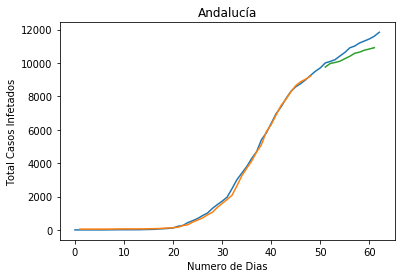

50 13
Epoch 1/100
 - 1s - loss: 0.0355
Epoch 2/100
 - 0s - loss: 0.0254
Epoch 3/100
 - 0s - loss: 0.0205
Epoch 4/100
 - 0s - loss: 0.0175
Epoch 5/100
 - 0s - loss: 0.0151
Epoch 6/100
 - 0s - loss: 0.0128
Epoch 7/100
 - 0s - loss: 0.0108
Epoch 8/100
 - 0s - loss: 0.0090
Epoch 9/100
 - 0s - loss: 0.0073
Epoch 10/100
 - 0s - loss: 0.0059
Epoch 11/100
 - 0s - loss: 0.0045
Epoch 12/100
 - 0s - loss: 0.0035
Epoch 13/100
 - 0s - loss: 0.0026
Epoch 14/100
 - 0s - loss: 0.0019
Epoch 15/100
 - 0s - loss: 0.0014
Epoch 16/100
 - 0s - loss: 0.0010
Epoch 17/100
 - 0s - loss: 7.0782e-04
Epoch 18/100
 - 0s - loss: 5.1849e-04
Epoch 19/100
 - 0s - loss: 3.9367e-04
Epoch 20/100
 - 0s - loss: 3.0728e-04
Epoch 21/100
 - 0s - loss: 2.6031e-04
Epoch 22/100
 - 0s - loss: 2.2612e-04
Epoch 23/100
 - 0s - loss: 2.0513e-04
Epoch 24/100
 - 0s - loss: 1.9481e-04
Epoch 25/100
 - 0s - loss: 1.8944e-04
Epoch 26/100
 - 0s - loss: 1.8688e-04
Epoch 27/100
 - 0s - loss: 1.8125e-04
Epoch 28/100
 - 0s - loss: 1.8291e-04
Epo

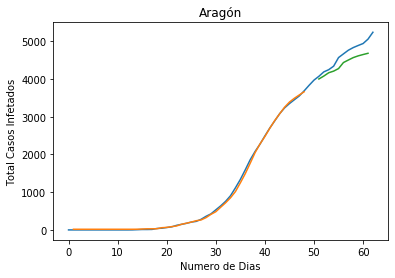

50 13
Epoch 1/100
 - 1s - loss: 0.0642
Epoch 2/100
 - 0s - loss: 0.0496
Epoch 3/100
 - 0s - loss: 0.0400
Epoch 4/100
 - 0s - loss: 0.0341
Epoch 5/100
 - 0s - loss: 0.0301
Epoch 6/100
 - 0s - loss: 0.0269
Epoch 7/100
 - 0s - loss: 0.0240
Epoch 8/100
 - 0s - loss: 0.0215
Epoch 9/100
 - 0s - loss: 0.0187
Epoch 10/100
 - 0s - loss: 0.0162
Epoch 11/100
 - 0s - loss: 0.0134
Epoch 12/100
 - 0s - loss: 0.0111
Epoch 13/100
 - 0s - loss: 0.0088
Epoch 14/100
 - 0s - loss: 0.0068
Epoch 15/100
 - 0s - loss: 0.0051
Epoch 16/100
 - 0s - loss: 0.0037
Epoch 17/100
 - 0s - loss: 0.0025
Epoch 18/100
 - 0s - loss: 0.0017
Epoch 19/100
 - 0s - loss: 0.0011
Epoch 20/100
 - 0s - loss: 7.2437e-04
Epoch 21/100
 - 0s - loss: 4.6581e-04
Epoch 22/100
 - 0s - loss: 3.0912e-04
Epoch 23/100
 - 0s - loss: 2.1464e-04
Epoch 24/100
 - 0s - loss: 1.6596e-04
Epoch 25/100
 - 0s - loss: 1.3672e-04
Epoch 26/100
 - 0s - loss: 1.2287e-04
Epoch 27/100
 - 0s - loss: 1.1665e-04
Epoch 28/100
 - 0s - loss: 1.1499e-04
Epoch 29/100
 -

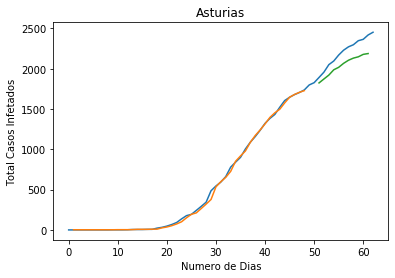

50 13
Epoch 1/100
 - 1s - loss: 0.1728
Epoch 2/100
 - 0s - loss: 0.1464
Epoch 3/100
 - 0s - loss: 0.1276
Epoch 4/100
 - 0s - loss: 0.1147
Epoch 5/100
 - 0s - loss: 0.1053
Epoch 6/100
 - 0s - loss: 0.0982
Epoch 7/100
 - 0s - loss: 0.0929
Epoch 8/100
 - 0s - loss: 0.0890
Epoch 9/100
 - 0s - loss: 0.0851
Epoch 10/100
 - 0s - loss: 0.0818
Epoch 11/100
 - 0s - loss: 0.0785
Epoch 12/100
 - 0s - loss: 0.0758
Epoch 13/100
 - 0s - loss: 0.0727
Epoch 14/100
 - 0s - loss: 0.0699
Epoch 15/100
 - 0s - loss: 0.0670
Epoch 16/100
 - 0s - loss: 0.0641
Epoch 17/100
 - 0s - loss: 0.0609
Epoch 18/100
 - 0s - loss: 0.0580
Epoch 19/100
 - 0s - loss: 0.0552
Epoch 20/100
 - 0s - loss: 0.0521
Epoch 21/100
 - 0s - loss: 0.0490
Epoch 22/100
 - 0s - loss: 0.0459
Epoch 23/100
 - 0s - loss: 0.0426
Epoch 24/100
 - 0s - loss: 0.0398
Epoch 25/100
 - 0s - loss: 0.0365
Epoch 26/100
 - 0s - loss: 0.0333
Epoch 27/100
 - 0s - loss: 0.0303
Epoch 28/100
 - 0s - loss: 0.0273
Epoch 29/100
 - 0s - loss: 0.0244
Epoch 30/100
 - 0

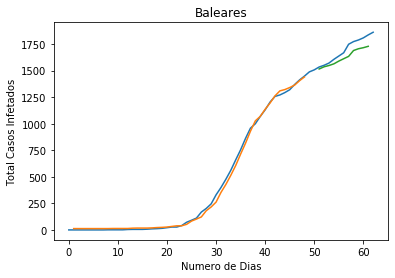

50 13
Epoch 1/100
 - 1s - loss: 0.1746
Epoch 2/100
 - 0s - loss: 0.1523
Epoch 3/100
 - 0s - loss: 0.1356
Epoch 4/100
 - 0s - loss: 0.1233
Epoch 5/100
 - 0s - loss: 0.1134
Epoch 6/100
 - 0s - loss: 0.1054
Epoch 7/100
 - 0s - loss: 0.0991
Epoch 8/100
 - 0s - loss: 0.0944
Epoch 9/100
 - 0s - loss: 0.0898
Epoch 10/100
 - 0s - loss: 0.0860
Epoch 11/100
 - 0s - loss: 0.0823
Epoch 12/100
 - 0s - loss: 0.0791
Epoch 13/100
 - 0s - loss: 0.0757
Epoch 14/100
 - 0s - loss: 0.0725
Epoch 15/100
 - 0s - loss: 0.0691
Epoch 16/100
 - 0s - loss: 0.0654
Epoch 17/100
 - 0s - loss: 0.0610
Epoch 18/100
 - 0s - loss: 0.0567
Epoch 19/100
 - 0s - loss: 0.0520
Epoch 20/100
 - 0s - loss: 0.0464
Epoch 21/100
 - 0s - loss: 0.0406
Epoch 22/100
 - 0s - loss: 0.0347
Epoch 23/100
 - 0s - loss: 0.0287
Epoch 24/100
 - 0s - loss: 0.0235
Epoch 25/100
 - 0s - loss: 0.0183
Epoch 26/100
 - 0s - loss: 0.0138
Epoch 27/100
 - 0s - loss: 0.0102
Epoch 28/100
 - 0s - loss: 0.0073
Epoch 29/100
 - 0s - loss: 0.0050
Epoch 30/100
 - 0

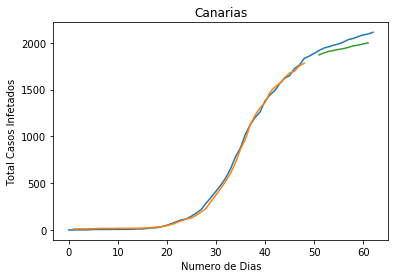

50 13
Epoch 1/100
 - 1s - loss: 0.0967
Epoch 2/100
 - 0s - loss: 0.0790
Epoch 3/100
 - 0s - loss: 0.0671
Epoch 4/100
 - 0s - loss: 0.0593
Epoch 5/100
 - 0s - loss: 0.0539
Epoch 6/100
 - 0s - loss: 0.0495
Epoch 7/100
 - 0s - loss: 0.0458
Epoch 8/100
 - 0s - loss: 0.0428
Epoch 9/100
 - 0s - loss: 0.0393
Epoch 10/100
 - 0s - loss: 0.0362
Epoch 11/100
 - 0s - loss: 0.0327
Epoch 12/100
 - 0s - loss: 0.0296
Epoch 13/100
 - 0s - loss: 0.0263
Epoch 14/100
 - 0s - loss: 0.0232
Epoch 15/100
 - 0s - loss: 0.0202
Epoch 16/100
 - 0s - loss: 0.0173
Epoch 17/100
 - 0s - loss: 0.0144
Epoch 18/100
 - 0s - loss: 0.0120
Epoch 19/100
 - 0s - loss: 0.0099
Epoch 20/100
 - 0s - loss: 0.0078
Epoch 21/100
 - 0s - loss: 0.0061
Epoch 22/100
 - 0s - loss: 0.0047
Epoch 23/100
 - 0s - loss: 0.0035
Epoch 24/100
 - 0s - loss: 0.0027
Epoch 25/100
 - 0s - loss: 0.0019
Epoch 26/100
 - 0s - loss: 0.0014
Epoch 27/100
 - 0s - loss: 0.0011
Epoch 28/100
 - 0s - loss: 8.0970e-04
Epoch 29/100
 - 0s - loss: 6.3239e-04
Epoch 30/

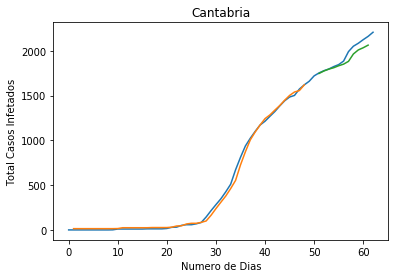

50 13
Epoch 1/100
 - 1s - loss: 0.0701
Epoch 2/100
 - 0s - loss: 0.0594
Epoch 3/100
 - 0s - loss: 0.0521
Epoch 4/100
 - 0s - loss: 0.0474
Epoch 5/100
 - 0s - loss: 0.0442
Epoch 6/100
 - 0s - loss: 0.0417
Epoch 7/100
 - 0s - loss: 0.0396
Epoch 8/100
 - 0s - loss: 0.0381
Epoch 9/100
 - 0s - loss: 0.0364
Epoch 10/100
 - 0s - loss: 0.0348
Epoch 11/100
 - 0s - loss: 0.0329
Epoch 12/100
 - 0s - loss: 0.0312
Epoch 13/100
 - 0s - loss: 0.0294
Epoch 14/100
 - 0s - loss: 0.0276
Epoch 15/100
 - 0s - loss: 0.0256
Epoch 16/100
 - 0s - loss: 0.0237
Epoch 17/100
 - 0s - loss: 0.0214
Epoch 18/100
 - 0s - loss: 0.0195
Epoch 19/100
 - 0s - loss: 0.0176
Epoch 20/100
 - 0s - loss: 0.0156
Epoch 21/100
 - 0s - loss: 0.0135
Epoch 22/100
 - 0s - loss: 0.0117
Epoch 23/100
 - 0s - loss: 0.0098
Epoch 24/100
 - 0s - loss: 0.0082
Epoch 25/100
 - 0s - loss: 0.0065
Epoch 26/100
 - 0s - loss: 0.0050
Epoch 27/100
 - 0s - loss: 0.0038
Epoch 28/100
 - 0s - loss: 0.0028
Epoch 29/100
 - 0s - loss: 0.0020
Epoch 30/100
 - 0

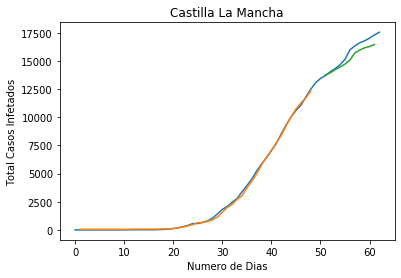

50 13
Epoch 1/100
 - 1s - loss: 0.0613
Epoch 2/100
 - 0s - loss: 0.0508
Epoch 3/100
 - 0s - loss: 0.0445
Epoch 4/100
 - 0s - loss: 0.0406
Epoch 5/100
 - 0s - loss: 0.0382
Epoch 6/100
 - 0s - loss: 0.0363
Epoch 7/100
 - 0s - loss: 0.0348
Epoch 8/100
 - 0s - loss: 0.0337
Epoch 9/100
 - 0s - loss: 0.0324
Epoch 10/100
 - 0s - loss: 0.0312
Epoch 11/100
 - 0s - loss: 0.0297
Epoch 12/100
 - 0s - loss: 0.0285
Epoch 13/100
 - 0s - loss: 0.0271
Epoch 14/100
 - 0s - loss: 0.0258
Epoch 15/100
 - 0s - loss: 0.0242
Epoch 16/100
 - 0s - loss: 0.0228
Epoch 17/100
 - 0s - loss: 0.0211
Epoch 18/100
 - 0s - loss: 0.0196
Epoch 19/100
 - 0s - loss: 0.0182
Epoch 20/100
 - 0s - loss: 0.0166
Epoch 21/100
 - 0s - loss: 0.0150
Epoch 22/100
 - 0s - loss: 0.0135
Epoch 23/100
 - 0s - loss: 0.0120
Epoch 24/100
 - 0s - loss: 0.0107
Epoch 25/100
 - 0s - loss: 0.0093
Epoch 26/100
 - 0s - loss: 0.0079
Epoch 27/100
 - 0s - loss: 0.0068
Epoch 28/100
 - 0s - loss: 0.0057
Epoch 29/100
 - 0s - loss: 0.0047
Epoch 30/100
 - 0

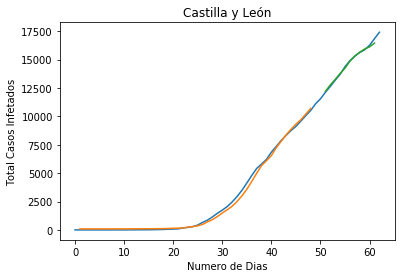

50 13
Epoch 1/100
 - 1s - loss: 0.0754
Epoch 2/100
 - 0s - loss: 0.0625
Epoch 3/100
 - 0s - loss: 0.0543
Epoch 4/100
 - 0s - loss: 0.0493
Epoch 5/100
 - 0s - loss: 0.0460
Epoch 6/100
 - 0s - loss: 0.0434
Epoch 7/100
 - 0s - loss: 0.0413
Epoch 8/100
 - 0s - loss: 0.0396
Epoch 9/100
 - 0s - loss: 0.0376
Epoch 10/100
 - 0s - loss: 0.0358
Epoch 11/100
 - 0s - loss: 0.0337
Epoch 12/100
 - 0s - loss: 0.0318
Epoch 13/100
 - 0s - loss: 0.0297
Epoch 14/100
 - 0s - loss: 0.0277
Epoch 15/100
 - 0s - loss: 0.0255
Epoch 16/100
 - 0s - loss: 0.0235
Epoch 17/100
 - 0s - loss: 0.0211
Epoch 18/100
 - 0s - loss: 0.0190
Epoch 19/100
 - 0s - loss: 0.0171
Epoch 20/100
 - 0s - loss: 0.0150
Epoch 21/100
 - 0s - loss: 0.0131
Epoch 22/100
 - 0s - loss: 0.0112
Epoch 23/100
 - 0s - loss: 0.0095
Epoch 24/100
 - 0s - loss: 0.0081
Epoch 25/100
 - 0s - loss: 0.0065
Epoch 26/100
 - 0s - loss: 0.0053
Epoch 27/100
 - 0s - loss: 0.0042
Epoch 28/100
 - 0s - loss: 0.0033
Epoch 29/100
 - 0s - loss: 0.0025
Epoch 30/100
 - 0

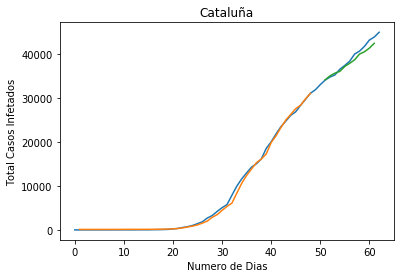

50 13
Epoch 1/100
 - 1s - loss: 0.0438
Epoch 2/100
 - 0s - loss: 0.0365
Epoch 3/100
 - 0s - loss: 0.0318
Epoch 4/100
 - 0s - loss: 0.0287
Epoch 5/100
 - 0s - loss: 0.0263
Epoch 6/100
 - 0s - loss: 0.0240
Epoch 7/100
 - 0s - loss: 0.0217
Epoch 8/100
 - 0s - loss: 0.0198
Epoch 9/100
 - 0s - loss: 0.0175
Epoch 10/100
 - 0s - loss: 0.0156
Epoch 11/100
 - 0s - loss: 0.0134
Epoch 12/100
 - 0s - loss: 0.0115
Epoch 13/100
 - 0s - loss: 0.0098
Epoch 14/100
 - 0s - loss: 0.0080
Epoch 15/100
 - 0s - loss: 0.0065
Epoch 16/100
 - 0s - loss: 0.0053
Epoch 17/100
 - 0s - loss: 0.0041
Epoch 18/100
 - 0s - loss: 0.0032
Epoch 19/100
 - 0s - loss: 0.0025
Epoch 20/100
 - 0s - loss: 0.0020
Epoch 21/100
 - 0s - loss: 0.0017
Epoch 22/100
 - 0s - loss: 0.0014
Epoch 23/100
 - 0s - loss: 0.0012
Epoch 24/100
 - 0s - loss: 0.0011
Epoch 25/100
 - 0s - loss: 0.0010
Epoch 26/100
 - 0s - loss: 9.5309e-04
Epoch 27/100
 - 0s - loss: 9.3949e-04
Epoch 28/100
 - 0s - loss: 9.2015e-04
Epoch 29/100
 - 0s - loss: 9.1598e-04
E

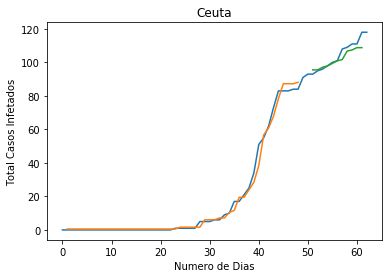

50 13
Epoch 1/100
 - 1s - loss: 0.0873
Epoch 2/100
 - 0s - loss: 0.0703
Epoch 3/100
 - 0s - loss: 0.0590
Epoch 4/100
 - 0s - loss: 0.0517
Epoch 5/100
 - 0s - loss: 0.0465
Epoch 6/100
 - 0s - loss: 0.0424
Epoch 7/100
 - 0s - loss: 0.0388
Epoch 8/100
 - 0s - loss: 0.0358
Epoch 9/100
 - 0s - loss: 0.0325
Epoch 10/100
 - 0s - loss: 0.0295
Epoch 11/100
 - 0s - loss: 0.0261
Epoch 12/100
 - 0s - loss: 0.0232
Epoch 13/100
 - 0s - loss: 0.0202
Epoch 14/100
 - 0s - loss: 0.0174
Epoch 15/100
 - 0s - loss: 0.0147
Epoch 16/100
 - 0s - loss: 0.0122
Epoch 17/100
 - 0s - loss: 0.0098
Epoch 18/100
 - 0s - loss: 0.0079
Epoch 19/100
 - 0s - loss: 0.0062
Epoch 20/100
 - 0s - loss: 0.0047
Epoch 21/100
 - 0s - loss: 0.0035
Epoch 22/100
 - 0s - loss: 0.0026
Epoch 23/100
 - 0s - loss: 0.0018
Epoch 24/100
 - 0s - loss: 0.0013
Epoch 25/100
 - 0s - loss: 8.8371e-04
Epoch 26/100
 - 0s - loss: 6.0749e-04
Epoch 27/100
 - 0s - loss: 4.2706e-04
Epoch 28/100
 - 0s - loss: 3.0804e-04
Epoch 29/100
 - 0s - loss: 2.3035e-

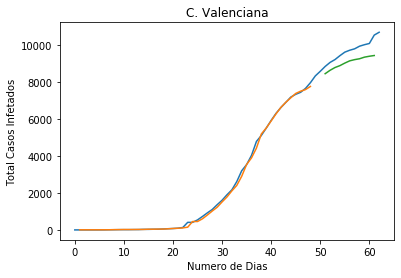

50 13
Epoch 1/100
 - 1s - loss: 0.0882
Epoch 2/100
 - 0s - loss: 0.0752
Epoch 3/100
 - 0s - loss: 0.0658
Epoch 4/100
 - 0s - loss: 0.0590
Epoch 5/100
 - 0s - loss: 0.0540
Epoch 6/100
 - 0s - loss: 0.0499
Epoch 7/100
 - 0s - loss: 0.0464
Epoch 8/100
 - 0s - loss: 0.0436
Epoch 9/100
 - 0s - loss: 0.0404
Epoch 10/100
 - 0s - loss: 0.0374
Epoch 11/100
 - 0s - loss: 0.0340
Epoch 12/100
 - 0s - loss: 0.0310
Epoch 13/100
 - 0s - loss: 0.0277
Epoch 14/100
 - 0s - loss: 0.0246
Epoch 15/100
 - 0s - loss: 0.0214
Epoch 16/100
 - 0s - loss: 0.0183
Epoch 17/100
 - 0s - loss: 0.0152
Epoch 18/100
 - 0s - loss: 0.0126
Epoch 19/100
 - 0s - loss: 0.0103
Epoch 20/100
 - 0s - loss: 0.0081
Epoch 21/100
 - 0s - loss: 0.0063
Epoch 22/100
 - 0s - loss: 0.0048
Epoch 23/100
 - 0s - loss: 0.0035
Epoch 24/100
 - 0s - loss: 0.0026
Epoch 25/100
 - 0s - loss: 0.0019
Epoch 26/100
 - 0s - loss: 0.0014
Epoch 27/100
 - 0s - loss: 0.0010
Epoch 28/100
 - 0s - loss: 8.1644e-04
Epoch 29/100
 - 0s - loss: 6.5619e-04
Epoch 30/

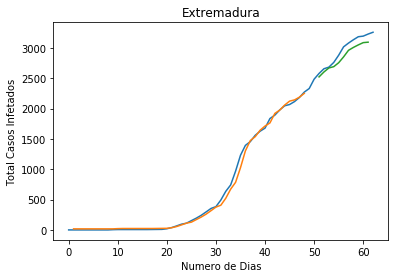

50 13
Epoch 1/100
 - 1s - loss: 0.0687
Epoch 2/100
 - 0s - loss: 0.0549
Epoch 3/100
 - 0s - loss: 0.0462
Epoch 4/100
 - 0s - loss: 0.0407
Epoch 5/100
 - 0s - loss: 0.0369
Epoch 6/100
 - 0s - loss: 0.0337
Epoch 7/100
 - 0s - loss: 0.0308
Epoch 8/100
 - 0s - loss: 0.0283
Epoch 9/100
 - 0s - loss: 0.0255
Epoch 10/100
 - 0s - loss: 0.0231
Epoch 11/100
 - 0s - loss: 0.0203
Epoch 12/100
 - 0s - loss: 0.0179
Epoch 13/100
 - 0s - loss: 0.0155
Epoch 14/100
 - 0s - loss: 0.0133
Epoch 15/100
 - 0s - loss: 0.0112
Epoch 16/100
 - 0s - loss: 0.0093
Epoch 17/100
 - 0s - loss: 0.0074
Epoch 18/100
 - 0s - loss: 0.0060
Epoch 19/100
 - 0s - loss: 0.0048
Epoch 20/100
 - 0s - loss: 0.0037
Epoch 21/100
 - 0s - loss: 0.0028
Epoch 22/100
 - 0s - loss: 0.0021
Epoch 23/100
 - 0s - loss: 0.0016
Epoch 24/100
 - 0s - loss: 0.0012
Epoch 25/100
 - 0s - loss: 9.2555e-04
Epoch 26/100
 - 0s - loss: 7.3013e-04
Epoch 27/100
 - 0s - loss: 6.0125e-04
Epoch 28/100
 - 0s - loss: 5.2559e-04
Epoch 29/100
 - 0s - loss: 4.6622e-

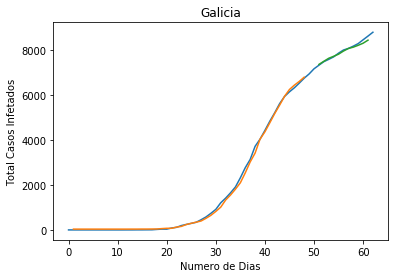

50 13
Epoch 1/100
 - 1s - loss: 0.0670
Epoch 2/100
 - 0s - loss: 0.0536
Epoch 3/100
 - 0s - loss: 0.0452
Epoch 4/100
 - 0s - loss: 0.0401
Epoch 5/100
 - 0s - loss: 0.0366
Epoch 6/100
 - 0s - loss: 0.0338
Epoch 7/100
 - 0s - loss: 0.0312
Epoch 8/100
 - 0s - loss: 0.0291
Epoch 9/100
 - 0s - loss: 0.0266
Epoch 10/100
 - 0s - loss: 0.0243
Epoch 11/100
 - 0s - loss: 0.0217
Epoch 12/100
 - 0s - loss: 0.0194
Epoch 13/100
 - 0s - loss: 0.0170
Epoch 14/100
 - 0s - loss: 0.0147
Epoch 15/100
 - 0s - loss: 0.0125
Epoch 16/100
 - 0s - loss: 0.0104
Epoch 17/100
 - 0s - loss: 0.0084
Epoch 18/100
 - 0s - loss: 0.0067
Epoch 19/100
 - 0s - loss: 0.0053
Epoch 20/100
 - 0s - loss: 0.0040
Epoch 21/100
 - 0s - loss: 0.0030
Epoch 22/100
 - 0s - loss: 0.0022
Epoch 23/100
 - 0s - loss: 0.0015
Epoch 24/100
 - 0s - loss: 0.0011
Epoch 25/100
 - 0s - loss: 7.2710e-04
Epoch 26/100
 - 0s - loss: 4.8902e-04
Epoch 27/100
 - 0s - loss: 3.3497e-04
Epoch 28/100
 - 0s - loss: 2.3229e-04
Epoch 29/100
 - 0s - loss: 1.6631e-

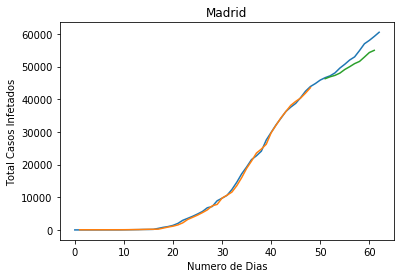

50 13
Epoch 1/100
 - 1s - loss: 0.1616
Epoch 2/100
 - 0s - loss: 0.1330
Epoch 3/100
 - 0s - loss: 0.1118
Epoch 4/100
 - 0s - loss: 0.0973
Epoch 5/100
 - 0s - loss: 0.0865
Epoch 6/100
 - 0s - loss: 0.0784
Epoch 7/100
 - 0s - loss: 0.0723
Epoch 8/100
 - 0s - loss: 0.0678
Epoch 9/100
 - 0s - loss: 0.0634
Epoch 10/100
 - 0s - loss: 0.0594
Epoch 11/100
 - 0s - loss: 0.0552
Epoch 12/100
 - 0s - loss: 0.0517
Epoch 13/100
 - 0s - loss: 0.0479
Epoch 14/100
 - 0s - loss: 0.0442
Epoch 15/100
 - 0s - loss: 0.0406
Epoch 16/100
 - 0s - loss: 0.0369
Epoch 17/100
 - 0s - loss: 0.0330
Epoch 18/100
 - 0s - loss: 0.0297
Epoch 19/100
 - 0s - loss: 0.0265
Epoch 20/100
 - 0s - loss: 0.0232
Epoch 21/100
 - 0s - loss: 0.0201
Epoch 22/100
 - 0s - loss: 0.0173
Epoch 23/100
 - 0s - loss: 0.0146
Epoch 24/100
 - 0s - loss: 0.0125
Epoch 25/100
 - 0s - loss: 0.0102
Epoch 26/100
 - 0s - loss: 0.0083
Epoch 27/100
 - 0s - loss: 0.0067
Epoch 28/100
 - 0s - loss: 0.0054
Epoch 29/100
 - 0s - loss: 0.0043
Epoch 30/100
 - 0

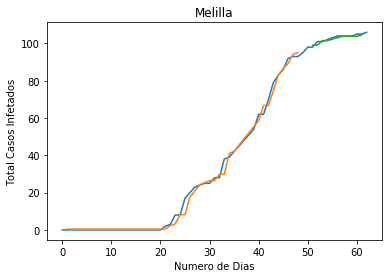

50 13
Epoch 1/100
 - 1s - loss: 0.1238
Epoch 2/100
 - 0s - loss: 0.1026
Epoch 3/100
 - 0s - loss: 0.0869
Epoch 4/100
 - 0s - loss: 0.0759
Epoch 5/100
 - 0s - loss: 0.0678
Epoch 6/100
 - 0s - loss: 0.0615
Epoch 7/100
 - 0s - loss: 0.0567
Epoch 8/100
 - 0s - loss: 0.0531
Epoch 9/100
 - 0s - loss: 0.0494
Epoch 10/100
 - 0s - loss: 0.0461
Epoch 11/100
 - 0s - loss: 0.0427
Epoch 12/100
 - 0s - loss: 0.0397
Epoch 13/100
 - 0s - loss: 0.0365
Epoch 14/100
 - 0s - loss: 0.0335
Epoch 15/100
 - 0s - loss: 0.0304
Epoch 16/100
 - 0s - loss: 0.0274
Epoch 17/100
 - 0s - loss: 0.0243
Epoch 18/100
 - 0s - loss: 0.0215
Epoch 19/100
 - 0s - loss: 0.0190
Epoch 20/100
 - 0s - loss: 0.0164
Epoch 21/100
 - 0s - loss: 0.0140
Epoch 22/100
 - 0s - loss: 0.0118
Epoch 23/100
 - 0s - loss: 0.0098
Epoch 24/100
 - 0s - loss: 0.0081
Epoch 25/100
 - 0s - loss: 0.0065
Epoch 26/100
 - 0s - loss: 0.0052
Epoch 27/100
 - 0s - loss: 0.0041
Epoch 28/100
 - 0s - loss: 0.0032
Epoch 29/100
 - 0s - loss: 0.0025
Epoch 30/100
 - 0

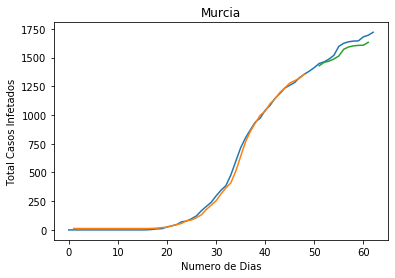

50 13
Epoch 1/100
 - 1s - loss: 0.1040
Epoch 2/100
 - 0s - loss: 0.0881
Epoch 3/100
 - 0s - loss: 0.0765
Epoch 4/100
 - 0s - loss: 0.0685
Epoch 5/100
 - 0s - loss: 0.0628
Epoch 6/100
 - 0s - loss: 0.0585
Epoch 7/100
 - 0s - loss: 0.0553
Epoch 8/100
 - 0s - loss: 0.0530
Epoch 9/100
 - 0s - loss: 0.0504
Epoch 10/100
 - 0s - loss: 0.0481
Epoch 11/100
 - 0s - loss: 0.0455
Epoch 12/100
 - 0s - loss: 0.0432
Epoch 13/100
 - 0s - loss: 0.0407
Epoch 14/100
 - 0s - loss: 0.0383
Epoch 15/100
 - 0s - loss: 0.0357
Epoch 16/100
 - 0s - loss: 0.0332
Epoch 17/100
 - 0s - loss: 0.0303
Epoch 18/100
 - 0s - loss: 0.0278
Epoch 19/100
 - 0s - loss: 0.0254
Epoch 20/100
 - 0s - loss: 0.0228
Epoch 21/100
 - 0s - loss: 0.0203
Epoch 22/100
 - 0s - loss: 0.0180
Epoch 23/100
 - 0s - loss: 0.0156
Epoch 24/100
 - 0s - loss: 0.0137
Epoch 25/100
 - 0s - loss: 0.0115
Epoch 26/100
 - 0s - loss: 0.0097
Epoch 27/100
 - 0s - loss: 0.0080
Epoch 28/100
 - 0s - loss: 0.0066
Epoch 29/100
 - 0s - loss: 0.0053
Epoch 30/100
 - 0

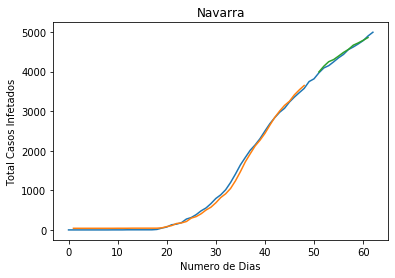

50 13
Epoch 1/100
 - 1s - loss: 0.0722
Epoch 2/100
 - 0s - loss: 0.0578
Epoch 3/100
 - 0s - loss: 0.0481
Epoch 4/100
 - 0s - loss: 0.0419
Epoch 5/100
 - 0s - loss: 0.0377
Epoch 6/100
 - 0s - loss: 0.0341
Epoch 7/100
 - 0s - loss: 0.0310
Epoch 8/100
 - 0s - loss: 0.0284
Epoch 9/100
 - 0s - loss: 0.0254
Epoch 10/100
 - 0s - loss: 0.0226
Epoch 11/100
 - 0s - loss: 0.0195
Epoch 12/100
 - 0s - loss: 0.0169
Epoch 13/100
 - 0s - loss: 0.0142
Epoch 14/100
 - 0s - loss: 0.0117
Epoch 15/100
 - 0s - loss: 0.0095
Epoch 16/100
 - 0s - loss: 0.0075
Epoch 17/100
 - 0s - loss: 0.0056
Epoch 18/100
 - 0s - loss: 0.0042
Epoch 19/100
 - 0s - loss: 0.0031
Epoch 20/100
 - 0s - loss: 0.0022
Epoch 21/100
 - 0s - loss: 0.0015
Epoch 22/100
 - 0s - loss: 0.0010
Epoch 23/100
 - 0s - loss: 6.6765e-04
Epoch 24/100
 - 0s - loss: 4.5828e-04
Epoch 25/100
 - 0s - loss: 3.0786e-04
Epoch 26/100
 - 0s - loss: 2.2341e-04
Epoch 27/100
 - 0s - loss: 1.7296e-04
Epoch 28/100
 - 0s - loss: 1.4512e-04
Epoch 29/100
 - 0s - loss: 

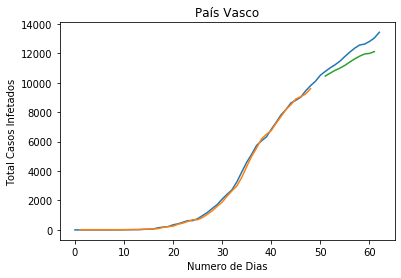

50 13
Epoch 1/100
 - 1s - loss: 0.0985
Epoch 2/100
 - 0s - loss: 0.0813
Epoch 3/100
 - 0s - loss: 0.0690
Epoch 4/100
 - 0s - loss: 0.0608
Epoch 5/100
 - 0s - loss: 0.0549
Epoch 6/100
 - 0s - loss: 0.0506
Epoch 7/100
 - 0s - loss: 0.0472
Epoch 8/100
 - 0s - loss: 0.0446
Epoch 9/100
 - 0s - loss: 0.0418
Epoch 10/100
 - 0s - loss: 0.0392
Epoch 11/100
 - 0s - loss: 0.0363
Epoch 12/100
 - 0s - loss: 0.0337
Epoch 13/100
 - 0s - loss: 0.0309
Epoch 14/100
 - 0s - loss: 0.0281
Epoch 15/100
 - 0s - loss: 0.0254
Epoch 16/100
 - 0s - loss: 0.0226
Epoch 17/100
 - 0s - loss: 0.0196
Epoch 18/100
 - 0s - loss: 0.0171
Epoch 19/100
 - 0s - loss: 0.0147
Epoch 20/100
 - 0s - loss: 0.0124
Epoch 21/100
 - 0s - loss: 0.0102
Epoch 22/100
 - 0s - loss: 0.0083
Epoch 23/100
 - 0s - loss: 0.0066
Epoch 24/100
 - 0s - loss: 0.0052
Epoch 25/100
 - 0s - loss: 0.0039
Epoch 26/100
 - 0s - loss: 0.0029
Epoch 27/100
 - 0s - loss: 0.0022
Epoch 28/100
 - 0s - loss: 0.0016
Epoch 29/100
 - 0s - loss: 0.0011
Epoch 30/100
 - 0

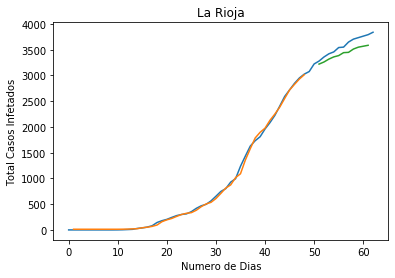

In [44]:
# persistence model
def model_persistence(x):
    return x

x = [day for day in range(len(df_es["DATE"].unique()))]
ccaas = list(df_es["CCAA"].unique())


i=0 
    
while( i < len(ccaas)):
    ccaa = ccaas[i]
    # y = df_it[df_it["CCAA"] == ccaa]["TOTAL_INFECTED"].values

    # plot1 = ax.plot(x, y, color = "k", alpha = 0.7, label = "Escala normal de casos infectados")


    d = {'Data' :df_es[df_es["CCAA"] == ccaa]["DATE"].values ,'Infetados': df_es[df_es["CCAA"] == ccaa]["TOTAL_INFECTED"].values}
    fds_linha = pd.DataFrame(data=d)
    fds = pd.DataFrame(data={"dias":fds_linha.index,'Infetados': df_es[df_es["CCAA"] == ccaa]["TOTAL_INFECTED"].values})
    
    values = np.reshape(fds["Infetados"].values,(-1,1))
    dataset = values.astype('float32')
    # fix random seed for reproducibility
    np.random.seed(7)

    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)
    
    # split into train and test sets
    train_size = int(len(dataset) * 0.8)
    test_size = len(dataset) - train_size
    train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
    print(len(train), len(test))
    
    # convert an array of values into a dataset matrix
    def create_dataset(dataset, look_back=1):
        dataX, dataY = [], []
        for i in range(len(dataset)-look_back-1):
            a = dataset[i:(i+look_back), 0]
            dataX.append(a)
            dataY.append(dataset[i + look_back, 0])
        return np.array(dataX), np.array(dataY)

    i += 1
    
    # reshape into X=t and Y=t+1
    look_back = 1
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)
    
    # reshape input to be [samples, time steps, features]
    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    
    # create and fit the LSTM network
    model = Sequential()
    model.add(LSTM(4, input_shape=(1, look_back)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    trainX[0] =0
    model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
    
    # make predictions
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    
    
    # invert predictions
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])
    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    print('Train Score: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
    print('Test Score: %.2f RMSE' % (testScore))
    
    # shift train predictions for plotting
    trainPredictPlot = np.empty_like(dataset)
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
    # shift test predictions for plotting
    testPredictPlot = np.empty_like(dataset)
    testPredictPlot[:, :] = np.nan
    testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
    # plot baseline and predictions
    plt.plot(scaler.inverse_transform(dataset))
    plt.plot(trainPredictPlot,label= "real")
    plt.plot(testPredictPlot,label= "predict")
    plt.title(ccaa)
    plt.xlabel('Numero de Dias') 
    plt.ylabel('Total Casos Infetados')
    plt.show()   
            

### Regiões de Itália

65 17
Epoch 1/100
 - 1s - loss: 0.2363
Epoch 2/100
 - 0s - loss: 0.1779
Epoch 3/100
 - 0s - loss: 0.1389
Epoch 4/100
 - 0s - loss: 0.1116
Epoch 5/100
 - 0s - loss: 0.0936
Epoch 6/100
 - 0s - loss: 0.0810
Epoch 7/100
 - 0s - loss: 0.0718
Epoch 8/100
 - 0s - loss: 0.0636
Epoch 9/100
 - 0s - loss: 0.0569
Epoch 10/100
 - 0s - loss: 0.0507
Epoch 11/100
 - 0s - loss: 0.0441
Epoch 12/100
 - 0s - loss: 0.0382
Epoch 13/100
 - 0s - loss: 0.0325
Epoch 14/100
 - 0s - loss: 0.0270
Epoch 15/100
 - 0s - loss: 0.0221
Epoch 16/100
 - 0s - loss: 0.0175
Epoch 17/100
 - 0s - loss: 0.0136
Epoch 18/100
 - 0s - loss: 0.0102
Epoch 19/100
 - 0s - loss: 0.0074
Epoch 20/100
 - 0s - loss: 0.0052
Epoch 21/100
 - 0s - loss: 0.0036
Epoch 22/100
 - 0s - loss: 0.0024
Epoch 23/100
 - 0s - loss: 0.0016
Epoch 24/100
 - 0s - loss: 0.0010
Epoch 25/100
 - 0s - loss: 6.9689e-04
Epoch 26/100
 - 0s - loss: 4.8277e-04
Epoch 27/100
 - 0s - loss: 3.6308e-04
Epoch 28/100
 - 0s - loss: 2.9406e-04
Epoch 29/100
 - 0s - loss: 2.5792e-

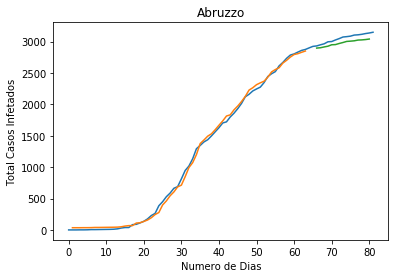

65 17
Epoch 1/100
 - 1s - loss: 0.3147
Epoch 2/100
 - 0s - loss: 0.2546
Epoch 3/100
 - 0s - loss: 0.2071
Epoch 4/100
 - 0s - loss: 0.1674
Epoch 5/100
 - 0s - loss: 0.1371
Epoch 6/100
 - 0s - loss: 0.1143
Epoch 7/100
 - 0s - loss: 0.0988
Epoch 8/100
 - 0s - loss: 0.0863
Epoch 9/100
 - 0s - loss: 0.0774
Epoch 10/100
 - 0s - loss: 0.0697
Epoch 11/100
 - 0s - loss: 0.0619
Epoch 12/100
 - 0s - loss: 0.0551
Epoch 13/100
 - 0s - loss: 0.0482
Epoch 14/100
 - 0s - loss: 0.0417
Epoch 15/100
 - 0s - loss: 0.0355
Epoch 16/100
 - 0s - loss: 0.0297
Epoch 17/100
 - 0s - loss: 0.0245
Epoch 18/100
 - 0s - loss: 0.0197
Epoch 19/100
 - 0s - loss: 0.0153
Epoch 20/100
 - 0s - loss: 0.0117
Epoch 21/100
 - 0s - loss: 0.0088
Epoch 22/100
 - 0s - loss: 0.0064
Epoch 23/100
 - 0s - loss: 0.0046
Epoch 24/100
 - 0s - loss: 0.0033
Epoch 25/100
 - 0s - loss: 0.0023
Epoch 26/100
 - 0s - loss: 0.0017
Epoch 27/100
 - 0s - loss: 0.0013
Epoch 28/100
 - 0s - loss: 9.7309e-04
Epoch 29/100
 - 0s - loss: 8.1801e-04
Epoch 30/

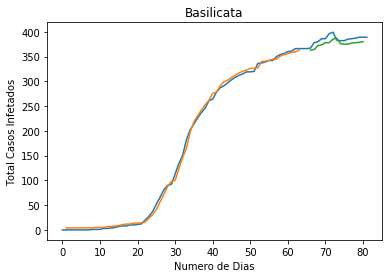

65 17
Epoch 1/100
 - 1s - loss: 0.1656
Epoch 2/100
 - 0s - loss: 0.1091
Epoch 3/100
 - 0s - loss: 0.0738
Epoch 4/100
 - 0s - loss: 0.0524
Epoch 5/100
 - 0s - loss: 0.0404
Epoch 6/100
 - 0s - loss: 0.0327
Epoch 7/100
 - 0s - loss: 0.0271
Epoch 8/100
 - 0s - loss: 0.0219
Epoch 9/100
 - 0s - loss: 0.0176
Epoch 10/100
 - 0s - loss: 0.0136
Epoch 11/100
 - 0s - loss: 0.0101
Epoch 12/100
 - 0s - loss: 0.0072
Epoch 13/100
 - 0s - loss: 0.0049
Epoch 14/100
 - 0s - loss: 0.0031
Epoch 15/100
 - 0s - loss: 0.0020
Epoch 16/100
 - 0s - loss: 0.0012
Epoch 17/100
 - 0s - loss: 7.4546e-04
Epoch 18/100
 - 0s - loss: 4.9217e-04
Epoch 19/100
 - 0s - loss: 3.5720e-04
Epoch 20/100
 - 0s - loss: 2.9305e-04
Epoch 21/100
 - 0s - loss: 2.6126e-04
Epoch 22/100
 - 0s - loss: 2.5295e-04
Epoch 23/100
 - 0s - loss: 2.4892e-04
Epoch 24/100
 - 0s - loss: 2.3815e-04
Epoch 25/100
 - 0s - loss: 2.3454e-04
Epoch 26/100
 - 0s - loss: 2.3247e-04
Epoch 27/100
 - 0s - loss: 2.3219e-04
Epoch 28/100
 - 0s - loss: 2.2849e-04
Epo

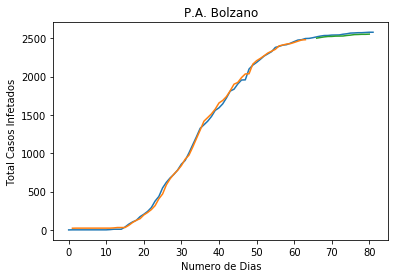

65 17
Epoch 1/100
 - 1s - loss: 0.2280
Epoch 2/100
 - 0s - loss: 0.1713
Epoch 3/100
 - 0s - loss: 0.1334
Epoch 4/100
 - 0s - loss: 0.1066
Epoch 5/100
 - 0s - loss: 0.0889
Epoch 6/100
 - 0s - loss: 0.0763
Epoch 7/100
 - 0s - loss: 0.0675
Epoch 8/100
 - 0s - loss: 0.0597
Epoch 9/100
 - 0s - loss: 0.0537
Epoch 10/100
 - 0s - loss: 0.0481
Epoch 11/100
 - 0s - loss: 0.0423
Epoch 12/100
 - 0s - loss: 0.0372
Epoch 13/100
 - 0s - loss: 0.0321
Epoch 14/100
 - 0s - loss: 0.0272
Epoch 15/100
 - 0s - loss: 0.0226
Epoch 16/100
 - 0s - loss: 0.0183
Epoch 17/100
 - 0s - loss: 0.0146
Epoch 18/100
 - 0s - loss: 0.0113
Epoch 19/100
 - 0s - loss: 0.0084
Epoch 20/100
 - 0s - loss: 0.0061
Epoch 21/100
 - 0s - loss: 0.0043
Epoch 22/100
 - 0s - loss: 0.0030
Epoch 23/100
 - 0s - loss: 0.0020
Epoch 24/100
 - 0s - loss: 0.0014
Epoch 25/100
 - 0s - loss: 9.3913e-04
Epoch 26/100
 - 0s - loss: 6.7178e-04
Epoch 27/100
 - 0s - loss: 5.1249e-04
Epoch 28/100
 - 0s - loss: 4.2290e-04
Epoch 29/100
 - 0s - loss: 3.7336e-

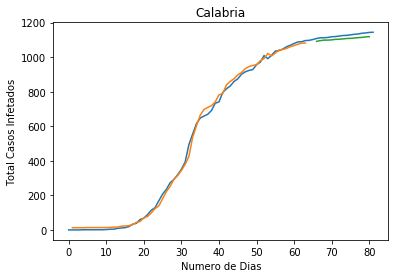

65 17
Epoch 1/100
 - 1s - loss: 0.2582
Epoch 2/100
 - 0s - loss: 0.2082
Epoch 3/100
 - 0s - loss: 0.1680
Epoch 4/100
 - 0s - loss: 0.1343
Epoch 5/100
 - 0s - loss: 0.1095
Epoch 6/100
 - 0s - loss: 0.0919
Epoch 7/100
 - 0s - loss: 0.0804
Epoch 8/100
 - 0s - loss: 0.0709
Epoch 9/100
 - 0s - loss: 0.0640
Epoch 10/100
 - 0s - loss: 0.0577
Epoch 11/100
 - 0s - loss: 0.0511
Epoch 12/100
 - 0s - loss: 0.0452
Epoch 13/100
 - 0s - loss: 0.0393
Epoch 14/100
 - 0s - loss: 0.0337
Epoch 15/100
 - 0s - loss: 0.0284
Epoch 16/100
 - 0s - loss: 0.0234
Epoch 17/100
 - 0s - loss: 0.0190
Epoch 18/100
 - 0s - loss: 0.0150
Epoch 19/100
 - 0s - loss: 0.0113
Epoch 20/100
 - 0s - loss: 0.0085
Epoch 21/100
 - 0s - loss: 0.0061
Epoch 22/100
 - 0s - loss: 0.0043
Epoch 23/100
 - 0s - loss: 0.0030
Epoch 24/100
 - 0s - loss: 0.0020
Epoch 25/100
 - 0s - loss: 0.0013
Epoch 26/100
 - 0s - loss: 9.0845e-04
Epoch 27/100
 - 0s - loss: 6.3457e-04
Epoch 28/100
 - 0s - loss: 4.7063e-04
Epoch 29/100
 - 0s - loss: 3.8115e-04
E

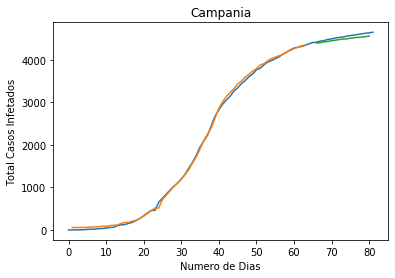

65 17
Epoch 1/100
 - 1s - loss: 0.2670
Epoch 2/100
 - 0s - loss: 0.2035
Epoch 3/100
 - 0s - loss: 0.1588
Epoch 4/100
 - 1s - loss: 0.1248
Epoch 5/100
 - 0s - loss: 0.1003
Epoch 6/100
 - 0s - loss: 0.0826
Epoch 7/100
 - 0s - loss: 0.0707
Epoch 8/100
 - 0s - loss: 0.0613
Epoch 9/100
 - 0s - loss: 0.0545
Epoch 10/100
 - 0s - loss: 0.0484
Epoch 11/100
 - 0s - loss: 0.0420
Epoch 12/100
 - 0s - loss: 0.0360
Epoch 13/100
 - 0s - loss: 0.0301
Epoch 14/100
 - 0s - loss: 0.0243
Epoch 15/100
 - 0s - loss: 0.0190
Epoch 16/100
 - 0s - loss: 0.0142
Epoch 17/100
 - 0s - loss: 0.0102
Epoch 18/100
 - 0s - loss: 0.0070
Epoch 19/100
 - 0s - loss: 0.0044
Epoch 20/100
 - 0s - loss: 0.0028
Epoch 21/100
 - 0s - loss: 0.0017
Epoch 22/100
 - 0s - loss: 0.0010
Epoch 23/100
 - 0s - loss: 6.4233e-04
Epoch 24/100
 - 0s - loss: 4.4109e-04
Epoch 25/100
 - 0s - loss: 3.3631e-04
Epoch 26/100
 - 0s - loss: 2.8980e-04
Epoch 27/100
 - 0s - loss: 2.6657e-04
Epoch 28/100
 - 0s - loss: 2.5592e-04
Epoch 29/100
 - 0s - loss: 

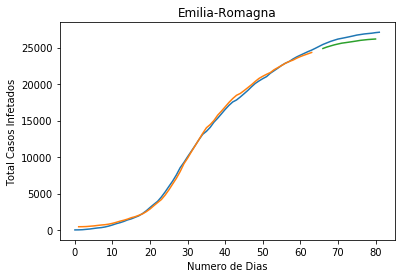

65 17
Epoch 1/100
 - 1s - loss: 0.3513
Epoch 2/100
 - 0s - loss: 0.2626
Epoch 3/100
 - 0s - loss: 0.1972
Epoch 4/100
 - 0s - loss: 0.1487
Epoch 5/100
 - 0s - loss: 0.1170
Epoch 6/100
 - 0s - loss: 0.0966
Epoch 7/100
 - 0s - loss: 0.0841
Epoch 8/100
 - 0s - loss: 0.0745
Epoch 9/100
 - 0s - loss: 0.0679
Epoch 10/100
 - 0s - loss: 0.0621
Epoch 11/100
 - 0s - loss: 0.0561
Epoch 12/100
 - 0s - loss: 0.0509
Epoch 13/100
 - 0s - loss: 0.0456
Epoch 14/100
 - 0s - loss: 0.0406
Epoch 15/100
 - 0s - loss: 0.0359
Epoch 16/100
 - 0s - loss: 0.0312
Epoch 17/100
 - 0s - loss: 0.0271
Epoch 18/100
 - 0s - loss: 0.0231
Epoch 19/100
 - 0s - loss: 0.0191
Epoch 20/100
 - 0s - loss: 0.0158
Epoch 21/100
 - 0s - loss: 0.0129
Epoch 22/100
 - 0s - loss: 0.0102
Epoch 23/100
 - 0s - loss: 0.0080
Epoch 24/100
 - 0s - loss: 0.0061
Epoch 25/100
 - 0s - loss: 0.0046
Epoch 26/100
 - 0s - loss: 0.0034
Epoch 27/100
 - 0s - loss: 0.0025
Epoch 28/100
 - 0s - loss: 0.0018
Epoch 29/100
 - 0s - loss: 0.0013
Epoch 30/100
 - 0

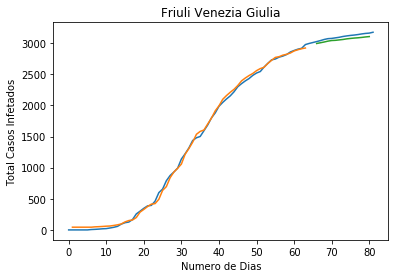

65 17
Epoch 1/100
 - 1s - loss: 0.1899
Epoch 2/100
 - 0s - loss: 0.1478
Epoch 3/100
 - 0s - loss: 0.1177
Epoch 4/100
 - 0s - loss: 0.0953
Epoch 5/100
 - 0s - loss: 0.0802
Epoch 6/100
 - 0s - loss: 0.0697
Epoch 7/100
 - 0s - loss: 0.0625
Epoch 8/100
 - 0s - loss: 0.0561
Epoch 9/100
 - 0s - loss: 0.0511
Epoch 10/100
 - 0s - loss: 0.0464
Epoch 11/100
 - 0s - loss: 0.0412
Epoch 12/100
 - 0s - loss: 0.0366
Epoch 13/100
 - 0s - loss: 0.0318
Epoch 14/100
 - 0s - loss: 0.0273
Epoch 15/100
 - 0s - loss: 0.0229
Epoch 16/100
 - 0s - loss: 0.0188
Epoch 17/100
 - 0s - loss: 0.0152
Epoch 18/100
 - 0s - loss: 0.0119
Epoch 19/100
 - 0s - loss: 0.0089
Epoch 20/100
 - 0s - loss: 0.0066
Epoch 21/100
 - 0s - loss: 0.0047
Epoch 22/100
 - 0s - loss: 0.0033
Epoch 23/100
 - 0s - loss: 0.0022
Epoch 24/100
 - 0s - loss: 0.0014
Epoch 25/100
 - 0s - loss: 9.3050e-04
Epoch 26/100
 - 0s - loss: 5.9686e-04
Epoch 27/100
 - 0s - loss: 3.9237e-04
Epoch 28/100
 - 0s - loss: 2.7063e-04
Epoch 29/100
 - 0s - loss: 2.0146e-

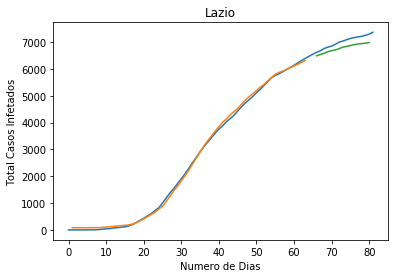

65 17
Epoch 1/100
 - 1s - loss: 0.1556
Epoch 2/100
 - 0s - loss: 0.1037
Epoch 3/100
 - 0s - loss: 0.0727
Epoch 4/100
 - 0s - loss: 0.0550
Epoch 5/100
 - 0s - loss: 0.0454
Epoch 6/100
 - 0s - loss: 0.0393
Epoch 7/100
 - 0s - loss: 0.0344
Epoch 8/100
 - 0s - loss: 0.0297
Epoch 9/100
 - 0s - loss: 0.0258
Epoch 10/100
 - 0s - loss: 0.0220
Epoch 11/100
 - 0s - loss: 0.0182
Epoch 12/100
 - 0s - loss: 0.0149
Epoch 13/100
 - 0s - loss: 0.0120
Epoch 14/100
 - 0s - loss: 0.0094
Epoch 15/100
 - 0s - loss: 0.0072
Epoch 16/100
 - 0s - loss: 0.0053
Epoch 17/100
 - 0s - loss: 0.0039
Epoch 18/100
 - 0s - loss: 0.0028
Epoch 19/100
 - 0s - loss: 0.0019
Epoch 20/100
 - 0s - loss: 0.0013
Epoch 21/100
 - 0s - loss: 9.3495e-04
Epoch 22/100
 - 0s - loss: 6.6535e-04
Epoch 23/100
 - 0s - loss: 4.9793e-04
Epoch 24/100
 - 0s - loss: 3.8667e-04
Epoch 25/100
 - 0s - loss: 3.1744e-04
Epoch 26/100
 - 0s - loss: 2.8850e-04
Epoch 27/100
 - 0s - loss: 2.6509e-04
Epoch 28/100
 - 0s - loss: 2.5058e-04
Epoch 29/100
 - 0s 

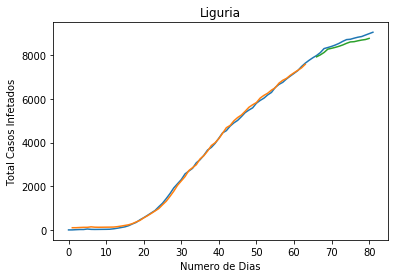

65 17
Epoch 1/100
 - 1s - loss: 0.1933
Epoch 2/100
 - 0s - loss: 0.1295
Epoch 3/100
 - 0s - loss: 0.0842
Epoch 4/100
 - 0s - loss: 0.0571
Epoch 5/100
 - 0s - loss: 0.0444
Epoch 6/100
 - 0s - loss: 0.0377
Epoch 7/100
 - 0s - loss: 0.0331
Epoch 8/100
 - 0s - loss: 0.0288
Epoch 9/100
 - 0s - loss: 0.0252
Epoch 10/100
 - 0s - loss: 0.0217
Epoch 11/100
 - 0s - loss: 0.0181
Epoch 12/100
 - 0s - loss: 0.0151
Epoch 13/100
 - 0s - loss: 0.0122
Epoch 14/100
 - 0s - loss: 0.0097
Epoch 15/100
 - 0s - loss: 0.0075
Epoch 16/100
 - 0s - loss: 0.0057
Epoch 17/100
 - 0s - loss: 0.0043
Epoch 18/100
 - 0s - loss: 0.0032
Epoch 19/100
 - 0s - loss: 0.0022
Epoch 20/100
 - 0s - loss: 0.0016
Epoch 21/100
 - 0s - loss: 0.0012
Epoch 22/100
 - 0s - loss: 8.6264e-04
Epoch 23/100
 - 0s - loss: 6.7546e-04
Epoch 24/100
 - 0s - loss: 5.3915e-04
Epoch 25/100
 - 0s - loss: 4.6055e-04
Epoch 26/100
 - 0s - loss: 4.1726e-04
Epoch 27/100
 - 0s - loss: 3.9944e-04
Epoch 28/100
 - 0s - loss: 3.7961e-04
Epoch 29/100
 - 0s - lo

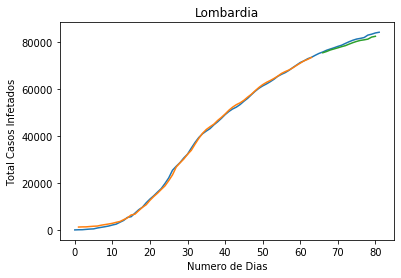

65 17
Epoch 1/100
 - 1s - loss: 0.2352
Epoch 2/100
 - 0s - loss: 0.1685
Epoch 3/100
 - 0s - loss: 0.1213
Epoch 4/100
 - 0s - loss: 0.0886
Epoch 5/100
 - 0s - loss: 0.0687
Epoch 6/100
 - 0s - loss: 0.0560
Epoch 7/100
 - 0s - loss: 0.0477
Epoch 8/100
 - 0s - loss: 0.0405
Epoch 9/100
 - 0s - loss: 0.0347
Epoch 10/100
 - 0s - loss: 0.0293
Epoch 11/100
 - 0s - loss: 0.0239
Epoch 12/100
 - 0s - loss: 0.0193
Epoch 13/100
 - 0s - loss: 0.0150
Epoch 14/100
 - 0s - loss: 0.0114
Epoch 15/100
 - 0s - loss: 0.0084
Epoch 16/100
 - 0s - loss: 0.0059
Epoch 17/100
 - 0s - loss: 0.0041
Epoch 18/100
 - 0s - loss: 0.0027
Epoch 19/100
 - 0s - loss: 0.0017
Epoch 20/100
 - 0s - loss: 0.0011
Epoch 21/100
 - 0s - loss: 6.6616e-04
Epoch 22/100
 - 0s - loss: 4.2449e-04
Epoch 23/100
 - 0s - loss: 2.8169e-04
Epoch 24/100
 - 0s - loss: 2.0529e-04
Epoch 25/100
 - 0s - loss: 1.6636e-04
Epoch 26/100
 - 0s - loss: 1.4399e-04
Epoch 27/100
 - 0s - loss: 1.3554e-04
Epoch 28/100
 - 0s - loss: 1.3069e-04
Epoch 29/100
 - 0s 

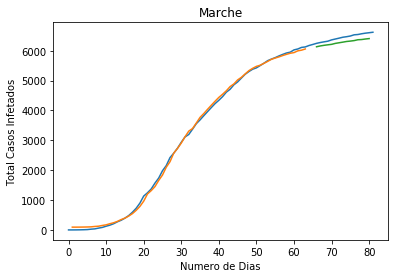

65 17
Epoch 1/100
 - 1s - loss: 0.1807
Epoch 2/100
 - 0s - loss: 0.1362
Epoch 3/100
 - 0s - loss: 0.1064
Epoch 4/100
 - 0s - loss: 0.0851
Epoch 5/100
 - 0s - loss: 0.0715
Epoch 6/100
 - 0s - loss: 0.0625
Epoch 7/100
 - 0s - loss: 0.0564
Epoch 8/100
 - 0s - loss: 0.0510
Epoch 9/100
 - 0s - loss: 0.0469
Epoch 10/100
 - 0s - loss: 0.0430
Epoch 11/100
 - 0s - loss: 0.0387
Epoch 12/100
 - 0s - loss: 0.0349
Epoch 13/100
 - 0s - loss: 0.0312
Epoch 14/100
 - 0s - loss: 0.0275
Epoch 15/100
 - 0s - loss: 0.0240
Epoch 16/100
 - 0s - loss: 0.0207
Epoch 17/100
 - 0s - loss: 0.0177
Epoch 18/100
 - 0s - loss: 0.0149
Epoch 19/100
 - 0s - loss: 0.0120
Epoch 20/100
 - 0s - loss: 0.0097
Epoch 21/100
 - 0s - loss: 0.0077
Epoch 22/100
 - 0s - loss: 0.0060
Epoch 23/100
 - 0s - loss: 0.0046
Epoch 24/100
 - 0s - loss: 0.0035
Epoch 25/100
 - 0s - loss: 0.0026
Epoch 26/100
 - 0s - loss: 0.0020
Epoch 27/100
 - 0s - loss: 0.0015
Epoch 28/100
 - 0s - loss: 0.0012
Epoch 29/100
 - 0s - loss: 9.6442e-04
Epoch 30/100


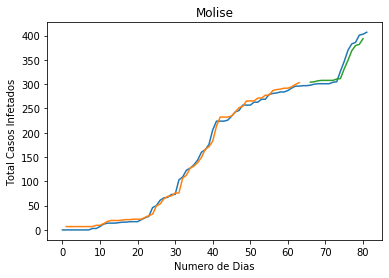

65 17
Epoch 1/100
 - 1s - loss: 0.1141
Epoch 2/100
 - 0s - loss: 0.0826
Epoch 3/100
 - 0s - loss: 0.0633
Epoch 4/100
 - 0s - loss: 0.0514
Epoch 5/100
 - 0s - loss: 0.0443
Epoch 6/100
 - 0s - loss: 0.0392
Epoch 7/100
 - 0s - loss: 0.0345
Epoch 8/100
 - 0s - loss: 0.0298
Epoch 9/100
 - 0s - loss: 0.0256
Epoch 10/100
 - 0s - loss: 0.0216
Epoch 11/100
 - 0s - loss: 0.0174
Epoch 12/100
 - 0s - loss: 0.0138
Epoch 13/100
 - 0s - loss: 0.0106
Epoch 14/100
 - 0s - loss: 0.0079
Epoch 15/100
 - 0s - loss: 0.0056
Epoch 16/100
 - 0s - loss: 0.0038
Epoch 17/100
 - 0s - loss: 0.0025
Epoch 18/100
 - 0s - loss: 0.0016
Epoch 19/100
 - 0s - loss: 9.2987e-04
Epoch 20/100
 - 0s - loss: 5.4325e-04
Epoch 21/100
 - 0s - loss: 3.1242e-04
Epoch 22/100
 - 0s - loss: 1.8526e-04
Epoch 23/100
 - 0s - loss: 1.1659e-04
Epoch 24/100
 - 0s - loss: 8.1169e-05
Epoch 25/100
 - 0s - loss: 6.4200e-05
Epoch 26/100
 - 0s - loss: 5.6570e-05
Epoch 27/100
 - 1s - loss: 5.2100e-05
Epoch 28/100
 - 1s - loss: 5.0555e-05
Epoch 29/10

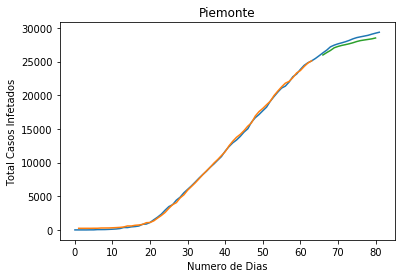

65 17
Epoch 1/100
 - 1s - loss: 0.2015
Epoch 2/100
 - 0s - loss: 0.1605
Epoch 3/100
 - 0s - loss: 0.1292
Epoch 4/100
 - 0s - loss: 0.1046
Epoch 5/100
 - 0s - loss: 0.0862
Epoch 6/100
 - 0s - loss: 0.0721
Epoch 7/100
 - 0s - loss: 0.0622
Epoch 8/100
 - 0s - loss: 0.0538
Epoch 9/100
 - 0s - loss: 0.0475
Epoch 10/100
 - 0s - loss: 0.0418
Epoch 11/100
 - 0s - loss: 0.0359
Epoch 12/100
 - 0s - loss: 0.0306
Epoch 13/100
 - 0s - loss: 0.0254
Epoch 14/100
 - 0s - loss: 0.0205
Epoch 15/100
 - 0s - loss: 0.0161
Epoch 16/100
 - 0s - loss: 0.0122
Epoch 17/100
 - 0s - loss: 0.0090
Epoch 18/100
 - 0s - loss: 0.0063
Epoch 19/100
 - 0s - loss: 0.0042
Epoch 20/100
 - 0s - loss: 0.0027
Epoch 21/100
 - 0s - loss: 0.0017
Epoch 22/100
 - 0s - loss: 0.0011
Epoch 23/100
 - 0s - loss: 6.7295e-04
Epoch 24/100
 - 0s - loss: 4.4576e-04
Epoch 25/100
 - 0s - loss: 3.1275e-04
Epoch 26/100
 - 0s - loss: 2.4880e-04
Epoch 27/100
 - 0s - loss: 2.1396e-04
Epoch 28/100
 - 0s - loss: 1.9859e-04
Epoch 29/100
 - 0s - loss: 

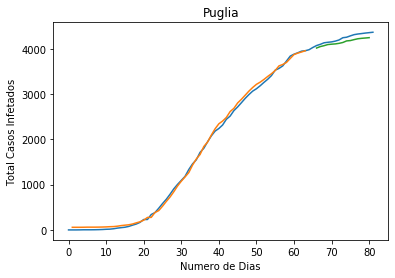

65 17
Epoch 1/100
 - 1s - loss: 0.2140
Epoch 2/100
 - 0s - loss: 0.1509
Epoch 3/100
 - 0s - loss: 0.1089
Epoch 4/100
 - 0s - loss: 0.0812
Epoch 5/100
 - 0s - loss: 0.0644
Epoch 6/100
 - 0s - loss: 0.0529
Epoch 7/100
 - 0s - loss: 0.0443
Epoch 8/100
 - 0s - loss: 0.0365
Epoch 9/100
 - 0s - loss: 0.0301
Epoch 10/100
 - 0s - loss: 0.0243
Epoch 11/100
 - 0s - loss: 0.0188
Epoch 12/100
 - 0s - loss: 0.0143
Epoch 13/100
 - 0s - loss: 0.0105
Epoch 14/100
 - 0s - loss: 0.0074
Epoch 15/100
 - 0s - loss: 0.0051
Epoch 16/100
 - 0s - loss: 0.0034
Epoch 17/100
 - 0s - loss: 0.0022
Epoch 18/100
 - 0s - loss: 0.0014
Epoch 19/100
 - 0s - loss: 8.4820e-04
Epoch 20/100
 - 0s - loss: 5.4919e-04
Epoch 21/100
 - 0s - loss: 3.7967e-04
Epoch 22/100
 - 0s - loss: 2.8652e-04
Epoch 23/100
 - 0s - loss: 2.4056e-04
Epoch 24/100
 - 0s - loss: 2.1319e-04
Epoch 25/100
 - 0s - loss: 2.0276e-04
Epoch 26/100
 - 0s - loss: 1.9843e-04
Epoch 27/100
 - 0s - loss: 1.9560e-04
Epoch 28/100
 - 0s - loss: 1.9251e-04
Epoch 29/10

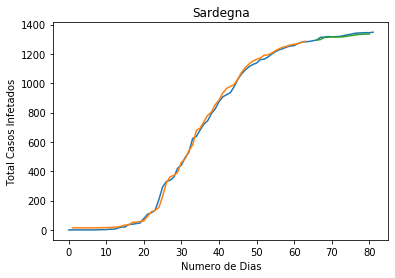

65 17
Epoch 1/100
 - 1s - loss: 0.2976
Epoch 2/100
 - 0s - loss: 0.2421
Epoch 3/100
 - 0s - loss: 0.2026
Epoch 4/100
 - 0s - loss: 0.1713
Epoch 5/100
 - 0s - loss: 0.1474
Epoch 6/100
 - 0s - loss: 0.1283
Epoch 7/100
 - 1s - loss: 0.1139
Epoch 8/100
 - 0s - loss: 0.1015
Epoch 9/100
 - 0s - loss: 0.0922
Epoch 10/100
 - 0s - loss: 0.0843
Epoch 11/100
 - 0s - loss: 0.0765
Epoch 12/100
 - 0s - loss: 0.0697
Epoch 13/100
 - 0s - loss: 0.0629
Epoch 14/100
 - 0s - loss: 0.0562
Epoch 15/100
 - 0s - loss: 0.0496
Epoch 16/100
 - 0s - loss: 0.0431
Epoch 17/100
 - 0s - loss: 0.0370
Epoch 18/100
 - 0s - loss: 0.0311
Epoch 19/100
 - 0s - loss: 0.0253
Epoch 20/100
 - 0s - loss: 0.0203
Epoch 21/100
 - 0s - loss: 0.0159
Epoch 22/100
 - 0s - loss: 0.0121
Epoch 23/100
 - 0s - loss: 0.0089
Epoch 24/100
 - 0s - loss: 0.0065
Epoch 25/100
 - 0s - loss: 0.0046
Epoch 26/100
 - 0s - loss: 0.0031
Epoch 27/100
 - 0s - loss: 0.0021
Epoch 28/100
 - 0s - loss: 0.0014
Epoch 29/100
 - 0s - loss: 9.8382e-04
Epoch 30/100


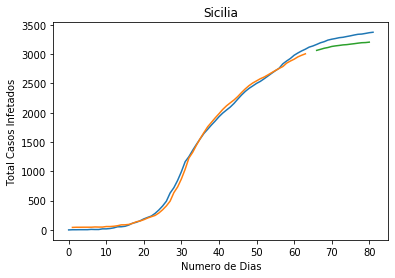

65 17
Epoch 1/100
 - 1s - loss: 0.2900
Epoch 2/100
 - 0s - loss: 0.2177
Epoch 3/100
 - 0s - loss: 0.1663
Epoch 4/100
 - 0s - loss: 0.1291
Epoch 5/100
 - 0s - loss: 0.1045
Epoch 6/100
 - 0s - loss: 0.0883
Epoch 7/100
 - 0s - loss: 0.0778
Epoch 8/100
 - 0s - loss: 0.0694
Epoch 9/100
 - 0s - loss: 0.0633
Epoch 10/100
 - 0s - loss: 0.0579
Epoch 11/100
 - 0s - loss: 0.0522
Epoch 12/100
 - 0s - loss: 0.0473
Epoch 13/100
 - 0s - loss: 0.0423
Epoch 14/100
 - 0s - loss: 0.0376
Epoch 15/100
 - 0s - loss: 0.0331
Epoch 16/100
 - 0s - loss: 0.0287
Epoch 17/100
 - 0s - loss: 0.0248
Epoch 18/100
 - 0s - loss: 0.0210
Epoch 19/100
 - 0s - loss: 0.0174
Epoch 20/100
 - 0s - loss: 0.0143
Epoch 21/100
 - 0s - loss: 0.0116
Epoch 22/100
 - 0s - loss: 0.0092
Epoch 23/100
 - 0s - loss: 0.0071
Epoch 24/100
 - 0s - loss: 0.0055
Epoch 25/100
 - 0s - loss: 0.0041
Epoch 26/100
 - 0s - loss: 0.0031
Epoch 27/100
 - 0s - loss: 0.0022
Epoch 28/100
 - 0s - loss: 0.0016
Epoch 29/100
 - 0s - loss: 0.0012
Epoch 30/100
 - 0

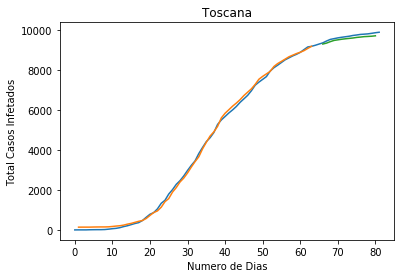

65 17
Epoch 1/100
 - 1s - loss: 0.1880
Epoch 2/100
 - 0s - loss: 0.1349
Epoch 3/100
 - 0s - loss: 0.0994
Epoch 4/100
 - 0s - loss: 0.0761
Epoch 5/100
 - 0s - loss: 0.0623
Epoch 6/100
 - 0s - loss: 0.0533
Epoch 7/100
 - 0s - loss: 0.0468
Epoch 8/100
 - 0s - loss: 0.0409
Epoch 9/100
 - 0s - loss: 0.0360
Epoch 10/100
 - 0s - loss: 0.0313
Epoch 11/100
 - 0s - loss: 0.0264
Epoch 12/100
 - 1s - loss: 0.0222
Epoch 13/100
 - 0s - loss: 0.0182
Epoch 14/100
 - 0s - loss: 0.0146
Epoch 15/100
 - 0s - loss: 0.0114
Epoch 16/100
 - 0s - loss: 0.0086
Epoch 17/100
 - 0s - loss: 0.0065
Epoch 18/100
 - 0s - loss: 0.0047
Epoch 19/100
 - 0s - loss: 0.0032
Epoch 20/100
 - 0s - loss: 0.0022
Epoch 21/100
 - 0s - loss: 0.0015
Epoch 22/100
 - 0s - loss: 0.0010
Epoch 23/100
 - 0s - loss: 7.0039e-04
Epoch 24/100
 - 0s - loss: 5.0226e-04
Epoch 25/100
 - 0s - loss: 3.7939e-04
Epoch 26/100
 - 0s - loss: 3.1921e-04
Epoch 27/100
 - 0s - loss: 2.8103e-04
Epoch 28/100
 - 0s - loss: 2.5540e-04
Epoch 29/100
 - 0s - loss: 

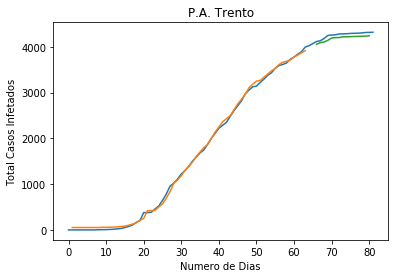

65 17
Epoch 1/100
 - 1s - loss: 0.3301
Epoch 2/100
 - 0s - loss: 0.2325
Epoch 3/100
 - 0s - loss: 0.1630
Epoch 4/100
 - 0s - loss: 0.1152
Epoch 5/100
 - 0s - loss: 0.0863
Epoch 6/100
 - 0s - loss: 0.0679
Epoch 7/100
 - 0s - loss: 0.0558
Epoch 8/100
 - 0s - loss: 0.0460
Epoch 9/100
 - 0s - loss: 0.0381
Epoch 10/100
 - 0s - loss: 0.0311
Epoch 11/100
 - 0s - loss: 0.0246
Epoch 12/100
 - 0s - loss: 0.0191
Epoch 13/100
 - 0s - loss: 0.0144
Epoch 14/100
 - 0s - loss: 0.0106
Epoch 15/100
 - 0s - loss: 0.0075
Epoch 16/100
 - 0s - loss: 0.0052
Epoch 17/100
 - 0s - loss: 0.0035
Epoch 18/100
 - 0s - loss: 0.0023
Epoch 19/100
 - 0s - loss: 0.0014
Epoch 20/100
 - 0s - loss: 9.3299e-04
Epoch 21/100
 - 0s - loss: 6.2034e-04
Epoch 22/100
 - 0s - loss: 4.4341e-04
Epoch 23/100
 - 0s - loss: 3.3921e-04
Epoch 24/100
 - 0s - loss: 2.7754e-04
Epoch 25/100
 - 0s - loss: 2.4708e-04
Epoch 26/100
 - 0s - loss: 2.3267e-04
Epoch 27/100
 - 0s - loss: 2.2612e-04
Epoch 28/100
 - 0s - loss: 2.2147e-04
Epoch 29/100
 -

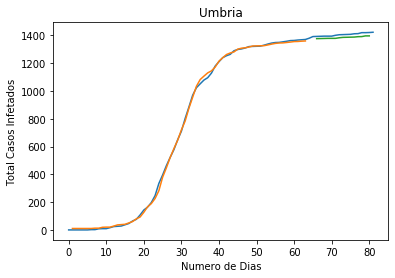

65 17
Epoch 1/100
 - 1s - loss: 0.4463
Epoch 2/100
 - 0s - loss: 0.3471
Epoch 3/100
 - 0s - loss: 0.2794
Epoch 4/100
 - 0s - loss: 0.2294
Epoch 5/100
 - 0s - loss: 0.1939
Epoch 6/100
 - 0s - loss: 0.1674
Epoch 7/100
 - 0s - loss: 0.1485
Epoch 8/100
 - 0s - loss: 0.1328
Epoch 9/100
 - 0s - loss: 0.1214
Epoch 10/100
 - 0s - loss: 0.1121
Epoch 11/100
 - 0s - loss: 0.1032
Epoch 12/100
 - 0s - loss: 0.0957
Epoch 13/100
 - 0s - loss: 0.0884
Epoch 14/100
 - 0s - loss: 0.0813
Epoch 15/100
 - 0s - loss: 0.0745
Epoch 16/100
 - 0s - loss: 0.0676
Epoch 17/100
 - 0s - loss: 0.0612
Epoch 18/100
 - 0s - loss: 0.0547
Epoch 19/100
 - 0s - loss: 0.0480
Epoch 20/100
 - 0s - loss: 0.0419
Epoch 21/100
 - 0s - loss: 0.0362
Epoch 22/100
 - 0s - loss: 0.0307
Epoch 23/100
 - 0s - loss: 0.0256
Epoch 24/100
 - 0s - loss: 0.0212
Epoch 25/100
 - 0s - loss: 0.0171
Epoch 26/100
 - 0s - loss: 0.0136
Epoch 27/100
 - 0s - loss: 0.0106
Epoch 28/100
 - 0s - loss: 0.0081
Epoch 29/100
 - 0s - loss: 0.0061
Epoch 30/100
 - 0

In [ ]:
# persistence model
def model_persistence(x):
    return x

x = [day for day in range(len(df_it["DATE"].unique()))]
ccaas = list(df_it["CCAA"].unique())


i=0 
    
while( i < len(ccaas)):
    ccaa = ccaas[i]
    # y = df_it[df_it["CCAA"] == ccaa]["TOTAL_INFECTED"].values

    # plot1 = ax.plot(x, y, color = "k", alpha = 0.7, label = "Escala normal de casos infectados")


    d = {'Data' :df_it[df_it["CCAA"] == ccaa]["DATE"].values ,'Infetados': df_it[df_it["CCAA"] == ccaa]["TOTAL_INFECTED"].values}
    fds_linha = pd.DataFrame(data=d)
    fds = pd.DataFrame(data={"dias":fds_linha.index,'Infetados': df_it[df_it["CCAA"] == ccaa]["TOTAL_INFECTED"].values})
    
    values = np.reshape(fds["Infetados"].values,(-1,1))
    dataset = values.astype('float32')
    # fix random seed for reproducibility
    np.random.seed(7)

    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)
    
    # split into train and test sets
    train_size = int(len(dataset) * 0.8)
    test_size = len(dataset) - train_size
    train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
    print(len(train), len(test))
    
    # convert an array of values into a dataset matrix
    def create_dataset(dataset, look_back=1):
        dataX, dataY = [], []
        for i in range(len(dataset)-look_back-1):
            a = dataset[i:(i+look_back), 0]
            dataX.append(a)
            dataY.append(dataset[i + look_back, 0])
        return np.array(dataX), np.array(dataY)

    i += 1
    
    # reshape into X=t and Y=t+1
    look_back = 1
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)
    
    # reshape input to be [samples, time steps, features]
    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    
    # create and fit the LSTM network
    model = Sequential()
    model.add(LSTM(4, input_shape=(1, look_back)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    trainX[0] =0
    model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
    
    # make predictions
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    
    
    # invert predictions
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])
    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    print('Train Score: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
    print('Test Score: %.2f RMSE' % (testScore))
    
    # shift train predictions for plotting
    trainPredictPlot = np.empty_like(dataset)
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
    # shift test predictions for plotting
    testPredictPlot = np.empty_like(dataset)
    testPredictPlot[:, :] = np.nan
    testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
    # plot baseline and predictions
    plt.plot(scaler.inverse_transform(dataset))
    plt.plot(trainPredictPlot,label= "real")
    plt.plot(testPredictPlot,label= "predict")
    plt.title(ccaa)
    plt.xlabel('Numero de Dias') 
    plt.ylabel('Total Casos Infetados')
    plt.show()